In [ ]:
#instalando pacote necessário
!pip install factor_analyzer==0.3.2

     |████████████████████████████████| 40 kB 3.4 MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-py3-none-any.whl size=40395 sha256=6b4bf1f11006a125a8f0d499e5c4dc62e363044d4546543bfc7aba2fb6cd7769
  Stored in directory: /root/.cache/pip/wheels/8d/9e/4c/fd4cb92cecf157b13702cc0907e5c56ddc48e5388134dc9f1a
Successfully built factor-analyzer


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer

from scipy import stats
from scipy.stats import chisquare

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
df = pd.read_excel('dataset.xlsx')
#df = pd.read_csv('dataset.csv', sep=';')
df.columns=['q1','q2','q3','q4','q5','q6','q7']
df.head()

,q1,q2,q3,q4,q5,q6,q7
0,3,4,5,5,5,4,4
1,4,3,4,4,4,4,4
2,4,5,4,4,5,4,4
3,1,1,2,2,1,1,1
4,2,4,3,5,5,4,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   q1      70 non-null     int64
 1   q2      70 non-null     int64
 2   q3      70 non-null     int64
 3   q4      70 non-null     int64
 4   q5      70 non-null     int64
 5   q6      70 non-null     int64
 6   q7      70 non-null     int64
dtypes: int64(7)
memory usage: 4.0 KB


# Análise Fatorial

Um dos pre-requisitos para escolha da quantidade de fatores é que seu autovalores não sejam muito menores que 1, conforme visto abaixo, deve ser escohido 2 fatores.

In [ ]:
# Create factor analysis object and perform factor analysis

fa = FactorAnalyzer(n_factors=7, rotation='varimax')
fa.fit(df)

# Checando autovalores
ev, v = fa.get_eigenvalues()
ev

array([3.24938455, 1.12777272, 0.77386273, 0.63412028, 0.50052917,
       0.38391569, 0.33041486])

confirmando agora de maneira visual, quanto mais horizontal a linha, menos é recomendado a utilização de tal como fator.

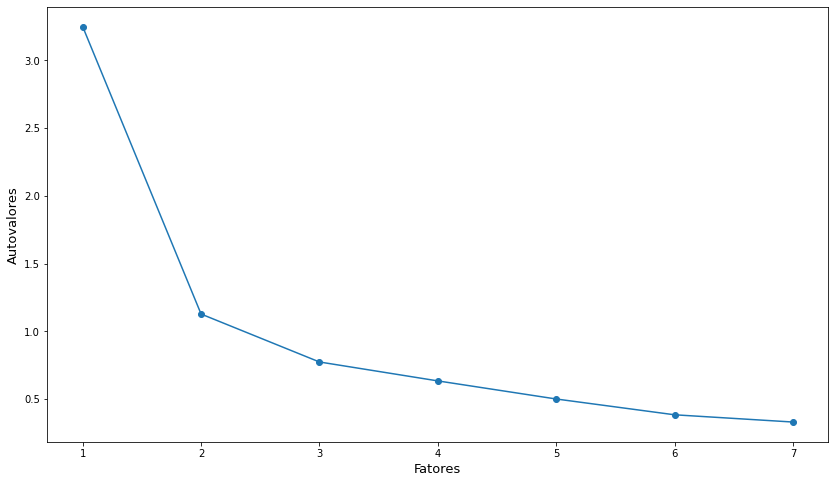

In [ ]:
#análise paralela
# Criando scree plot 

plt.figure(figsize=(14,8))
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.xlabel('Fatores', fontsize=13)
plt.ylabel('Autovalores', fontsize=13)

plt.show()

## Análise fatorial com fatores com rotação VARIMAX

In [ ]:
fa = FactorAnalyzer(n_factors=2, rotation='varimax')
fa.fit(df)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=2, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

## Matriz L de cargas fatoriais estimadas

In [ ]:
#coeficientes do modelo de análise fatorial
L = fa.loadings_
np.round(L,2)

array([[0.11, 0.57],
       [0.57, 0.09],
       [0.32, 0.67],
       [0.49, 0.57],
       [0.77, 0.35],
       [0.68, 0.26],
       [0.13, 0.52]])

In [ ]:
#transformando em dataframe para manipulação
L = pd.DataFrame(fa.loadings_)
np.round(L,2)
L.index = df.columns
L.columns = ['FA1','FA2',]
L

,FA1,FA2
q1,0.108152,0.567404
q2,0.571643,0.086565
q3,0.316175,0.667611
q4,0.487841,0.569778
q5,0.770695,0.347540
q6,0.682143,0.262474
q7,0.132634,0.519298


In [ ]:
#organinzando por ordem crescente 
L.sort_values(by=['FA1'],ascending=False)


,FA1,FA2
q5,0.770695,0.347540
q6,0.682143,0.262474
q2,0.571643,0.086565
q4,0.487841,0.569778
q3,0.316175,0.667611
q7,0.132634,0.519298
q1,0.108152,0.567404


Analisando a tabela acima, pode-se concluir que a questão 5 é o atributo que tem maior relevância no FA1, seguido da questão 6 e questão 2. Inclusive será mudado o nome do FA1 para vis_like pois as questões 5 e 6 remetem a perguntas da importância das visualizações e curtidas no instagram. Isto é feito devido a futuras manipulações, como os scores dos fatores.

In [ ]:
L.sort_values(by='FA2',ascending=False)


,FA1,FA2
q3,0.316175,0.667611
q4,0.487841,0.569778
q1,0.108152,0.567404
q7,0.132634,0.519298
q5,0.770695,0.347540
q6,0.682143,0.262474
q2,0.571643,0.086565


FA2 = postfeed_story

## Variância explicada por cada fator

In [ ]:
#variâncias
fa.get_factor_variance()

(array([1.75330848, 1.55913889]),
 array([0.25047264, 0.22273413]),
 array([0.25047264, 0.47320677]))

In [ ]:
np.sum(fa.get_factor_variance())


4.509333535588882

In [ ]:
fa.get_factor_variance()/np.sum(fa.get_factor_variance())

array([[0.38881765, 0.34575816],
       [0.05554538, 0.04939402],
       [0.05554538, 0.1049394 ]])

## Variância percentual explicada por cada fator

In [ ]:
np.round(fa.get_factor_variance()/np.sum(fa.get_factor_variance()),2)


array([[0.39, 0.35],
       [0.06, 0.05],
       [0.06, 0.1 ]])

O primeiro fator explica 39% da variável total dos dados e o segundo 35%. Nota-se que depois do segundo os valores explicados são pequenos.

Até agora foi resumido 7 atributos em 2 fatores  e abaixo mostrarei a utilidade dos fatores

In [ ]:
#adicionando os scores dos fatores ao dataset original
df[['Fator1','Fator2']] = np.array(fa.fit_transform(df))[:, 0:2]
df.head()

,q1,q2,q3,q4,q5,q6,q7,Fator1,Fator2
0,3,4,5,5,5,4,4,0.833701,1.219954
1,4,3,4,4,4,4,4,0.020347,0.990355
2,4,5,4,4,5,4,4,0.898786,0.761240
3,1,1,2,2,1,1,1,-2.188873,-1.294638
4,2,4,3,5,5,4,2,1.280709,-0.324868


In [ ]:
df.sort_values(by='Fator1',ascending=False).head(10)


,q1,q2,q3,q4,q5,q6,q7,Fator1,Fator2
12,2,4,2,3,5,5,2,1.481441,-1.272480
31,3,4,5,5,5,5,1,1.430135,0.403336
38,3,4,4,5,5,5,3,1.314461,0.503060
6,2,4,4,5,5,4,1,1.301960,-0.179126
17,2,4,3,5,5,4,2,1.280709,-0.324868
4,2,4,3,5,5,4,2,1.280709,-0.324868
7,2,4,3,5,5,4,2,1.280709,-0.324868
27,5,5,5,5,5,5,3,1.214187,1.336329
43,3,4,3,4,5,4,3,0.981666,-0.046016
63,2,4,3,3,4,5,2,0.922895,-0.853947


Quanto maior o score do Fator1, mais importante é considerado as visualizações e curtidas para o entrevistado.

In [ ]:
df.sort_values(by='Fator2',ascending=False).head(10)


,q1,q2,q3,q4,q5,q6,q7,Fator1,Fator2
18,5,4,5,5,4,3,4,-0.188472,1.870459
16,5,4,5,5,4,3,4,-0.188472,1.870459
66,4,2,5,5,5,3,3,0.110077,1.527978
27,5,5,5,5,5,5,3,1.214187,1.336329
24,4,4,4,5,4,2,4,-0.316647,1.287996
0,3,4,5,5,5,4,4,0.833701,1.219954
28,3,3,5,5,3,3,3,-0.552321,1.210258
1,4,3,4,4,4,4,4,0.020347,0.990355
15,4,3,4,5,4,4,3,0.207573,0.982981
13,4,3,4,5,4,4,3,0.207573,0.982981


Quanto maior o score do Fator2, mais importante é considerado as publicações no feed e no story para o entrevistado.

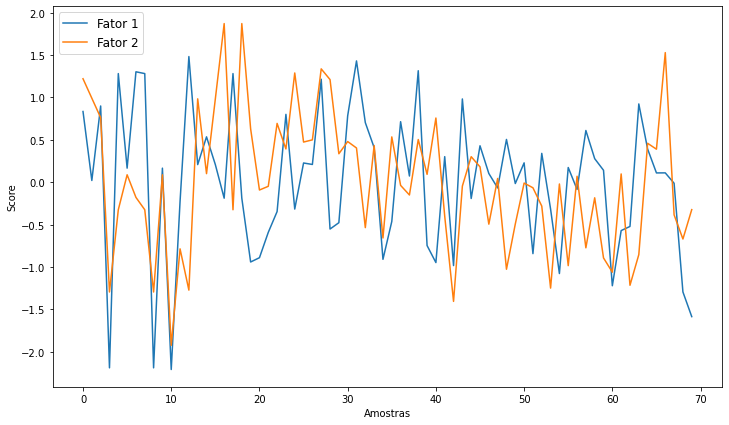

In [ ]:
plt.figure(figsize = (12, 7))

plt.plot(df['Fator1'], label = 'Fator 1')
plt.plot(df['Fator2'], label = 'Fator 2')

plt.legend(loc='upper left', prop = {'size': 12})
plt.xlabel('Amostras');
plt.ylabel('Score');



# Teste de confiabilidade

Motivos de se usar o alfa de cronbach para testar a confiabilidade do questionário:

I. O coeficiente alfa de Cronbach fornece uma medida razoável de confiabilidade em um único
teste. Dessa forma, não são necessárias repetições ou aplicações paralelas de um teste para a
estimativa da consistência do mesmo.

II. A fórmula geral do coeficiente alfa de Cronbach permite sua aplicação a questionários de
múltipla-escolha de escalas dicotômicas ou escalas atitudinais de variáveis categóricas politômicas.

III. O coeficiente alfa de Cronbach pode ser facilmente calculado por princípios estatísticos
básicos.

In [ ]:
#definindo uma função para fazer o alfa de cronbach

def cronbach_alpha(df):
  df_corr = df.corr() #matriz de correlação do df
  N = df.shape[1] #número de registros do df
  rs = np.array([])
  for i, col in enumerate(df_corr.columns):
    sum_ = df_corr[col][i+1:].values
    rs = np.append(sum_, rs)
  mean_r = np.mean(rs)

#usando a fórmula
  cronbach_alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
  return cronbach_alpha 


In [ ]:
cronbach_alpha(df)

0.868459153227247

internal consistency = good

# Teste de proporção (Qui-Quadrado)

na questão 1, "Quanto você acredita conhecer sobre o Instagram como ferramenta de marketing?", vamos formular uma hipótese, por exemplo, que acredita-se que 50% das pessoas iriam responder "muito" ou "moderado" e aí faremos o teste, confrontando o percentual q respondeu na amostra

H0: Os itens da questão 1 têm a mesma chance de ocorrência

H1: Os itens da questão 1 têm chance de ocorrência diferente